# Fundamentials of Data Analysis Project 2019.

## Libraries 

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import axes_style
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle

## Loading the dataset 
Here I have used seaborn to load the csv file data. From this point I wold like to visually see how it is structured so I used the tips.head(2) to show me the first two lines only. If you prefer to view more rows simply put the number that you want to view in the (). This can also be completed from the bottom of the dataframe using tips.tail(?)


In [123]:
tips = sns.load_dataset("tips")

We can also view whole or parts of columns. The blow example will show the first five rows of the tip column and will also display that the data type is a float

In [124]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [125]:
#Below we can see .head per colum and datatype. 
tips["tip"].head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [126]:
# See the Shape of the Data 
tips.shape

(244, 7)

In [127]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [128]:
#Group based on gender so we can see of m / f
group = tips.groupby("sex")
group.sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [129]:
# Count the amount of F/M
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

In [130]:
# See tips on different days
tips.groupby('day').sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [131]:
# Mean of the tips column
tips["tip"].mean()

2.9982786885245902

In [132]:
#Group the Mean
group.mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [133]:
# Median of the tips column
tips["tip"].median()

2.9

In [134]:
# Mode of the tips column
tips["tip"].mode()

0    2.0
dtype: float64

## Visualise The data

What and Why ?????????????

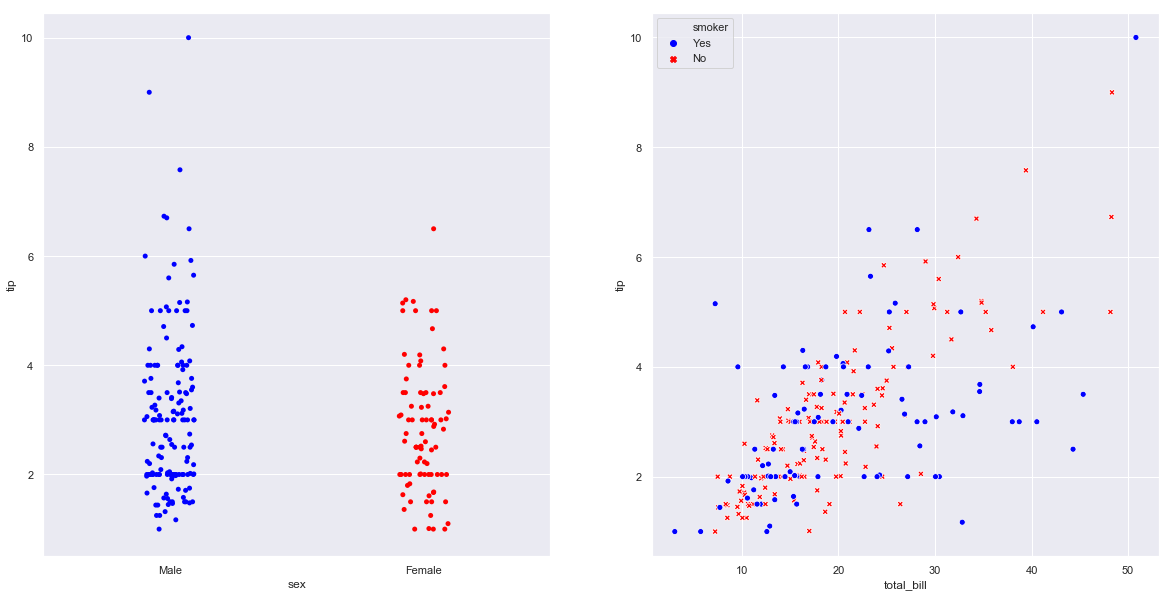

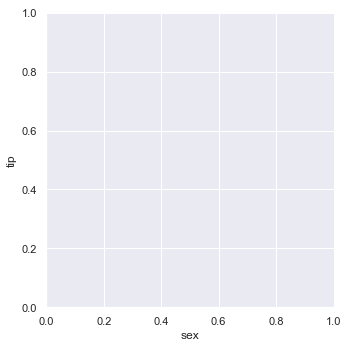

In [151]:
# ScatterPlot
colours = ["blue", "red"] # Define Colours 
f, axes = plt.subplots(1, 2)
sns.set()
sns.set(rc={'figure.figsize':(20,10)})
sns.catplot(x="sex", y="tip", data=tips, palette=colours, ax=axes[0])
sns.scatterplot(x="total_bill", y ="tip", hue ="smoker", style ="smoker", data=tips, palette=colours,  ax=axes[1])



We can see that the majority of the total bill is betwen 10 and qpprox 25. 

<Figure size 1440x720 with 0 Axes>

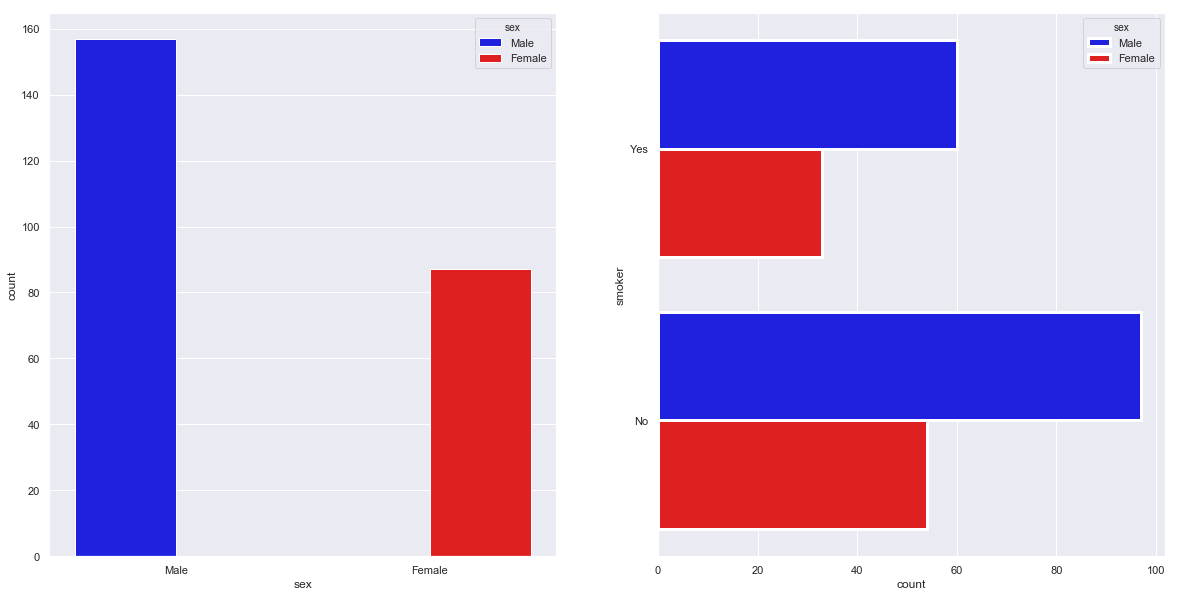

In [150]:
# CountPlot (https://seaborn.pydata.org/generated/seaborn.countplot.html)

colours = ["blue", "red"] # Define Colours 
hue_order = ["Male", "Female"]
suptitle("Count Plot - Smokers", fontsize=40) # Define title and size

f, axes = plt.subplots(1, 2)
sns.countplot(x='sex', hue=hue, data=tips, palette=colours,  ax=axes[0])
sns.countplot(y="smoker", linewidth=3, data=tips, hue="sex", palette=colours ,ax=axes[1])


sns.set()
sns.set(rc={'figure.figsize':(20,10)})



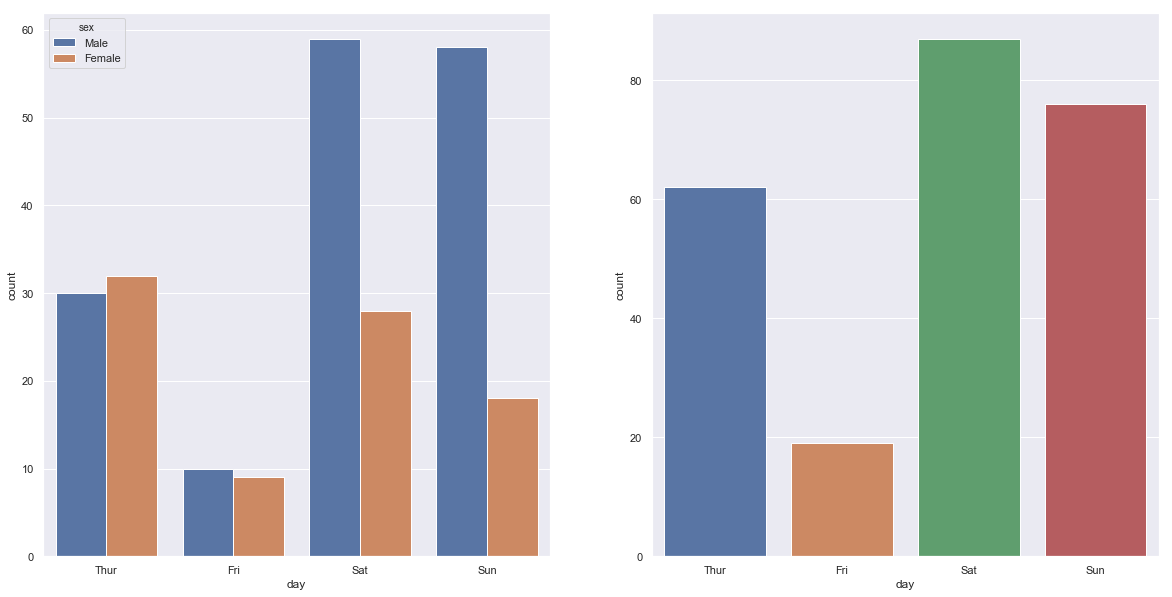

In [52]:
# CountPlot (https://seaborn.pydata.org/generated/seaborn.countplot.html)

df = sns.load_dataset("tips")
x, y, hue = "day", "prop", "sex"
hue_order = ["Male", "Female"]

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.countplot(x=x, data=df, ax=axes[1])

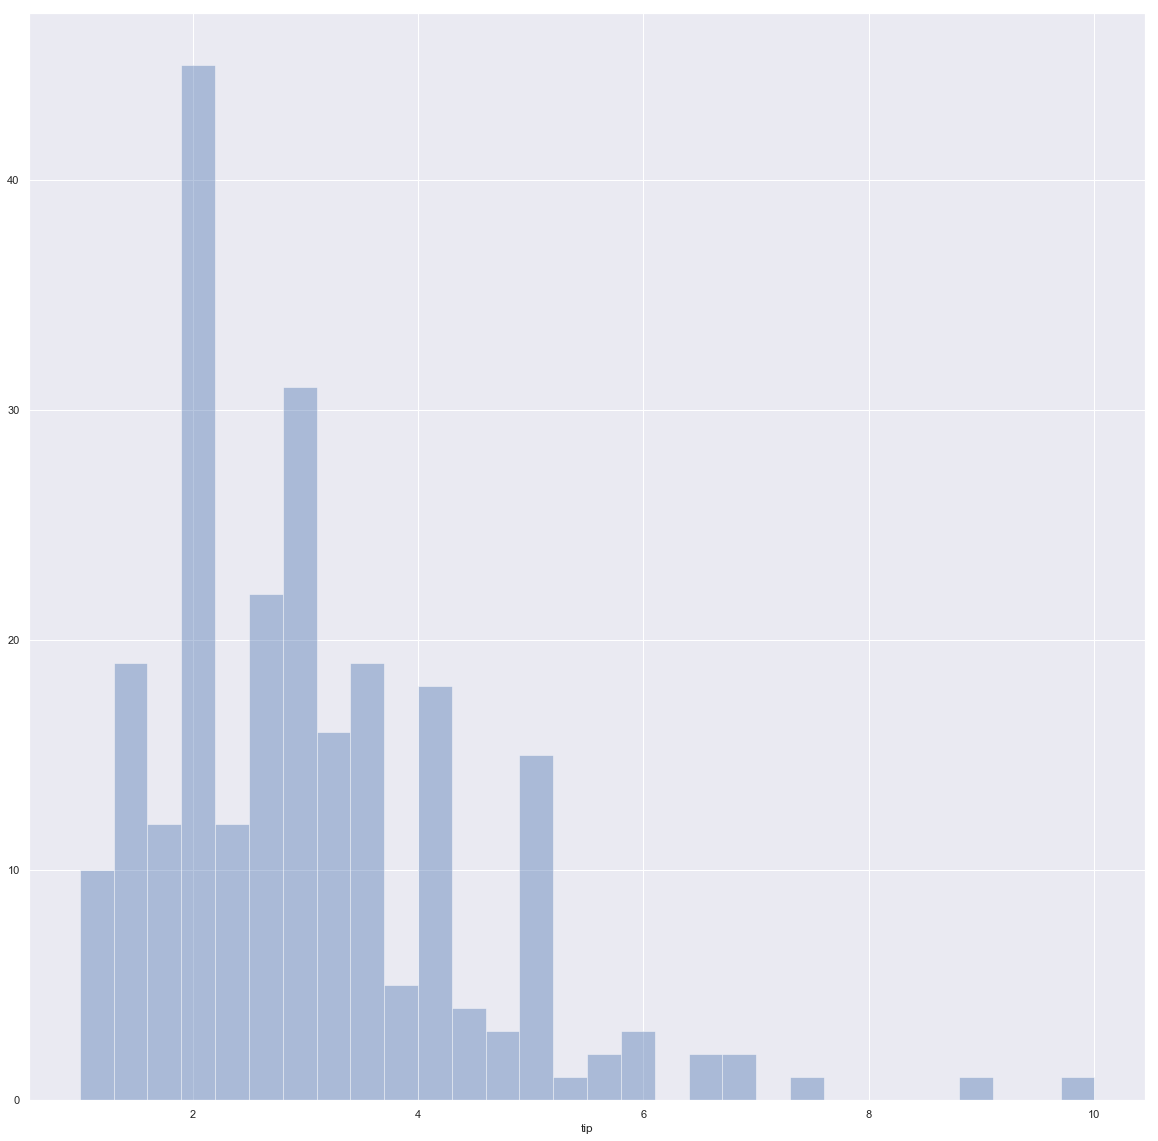

In [53]:
# Histogram, Bins allow us to view more accurate results. From the Histogram we can see that most tips are between 2 and 4 

sns.set(rc={'figure.figsize':(20,20)})
sns.distplot(tips['tip'], kde=False, bins=30);

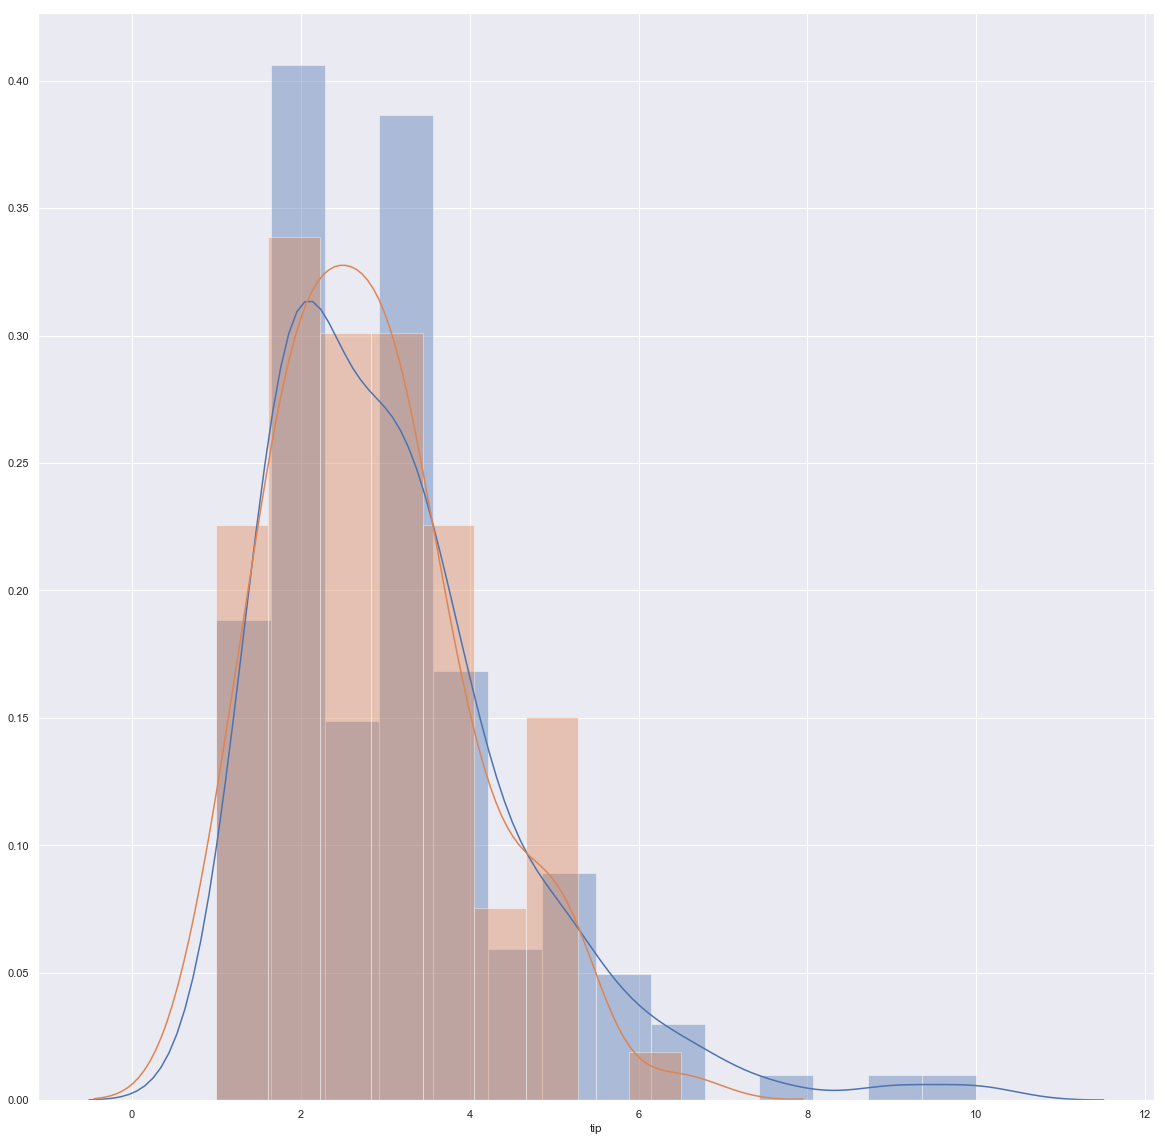

In [58]:
# Histogram to compare M v F

# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

female = tips.loc[tips["sex"] == "Female", ["sex", "tip"]]
male = tips.loc[tips["sex"] == "Male", ["sex", "tip"]]

sns.set(rc={'figure.figsize':(20,20)})
sns.distplot(male["tip"])
sns.distplot(female["tip"])

In [27]:
# Visulaise the smoker column.
tips.groupby(by = "smoker")["tip"].describe().T

smoker,Yes,No
count,93.000000,151.000000
mean,3.008710,2.991854
std,1.401468,1.377190
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.740000
75%,3.680000,3.505000
max,10.000000,9.000000


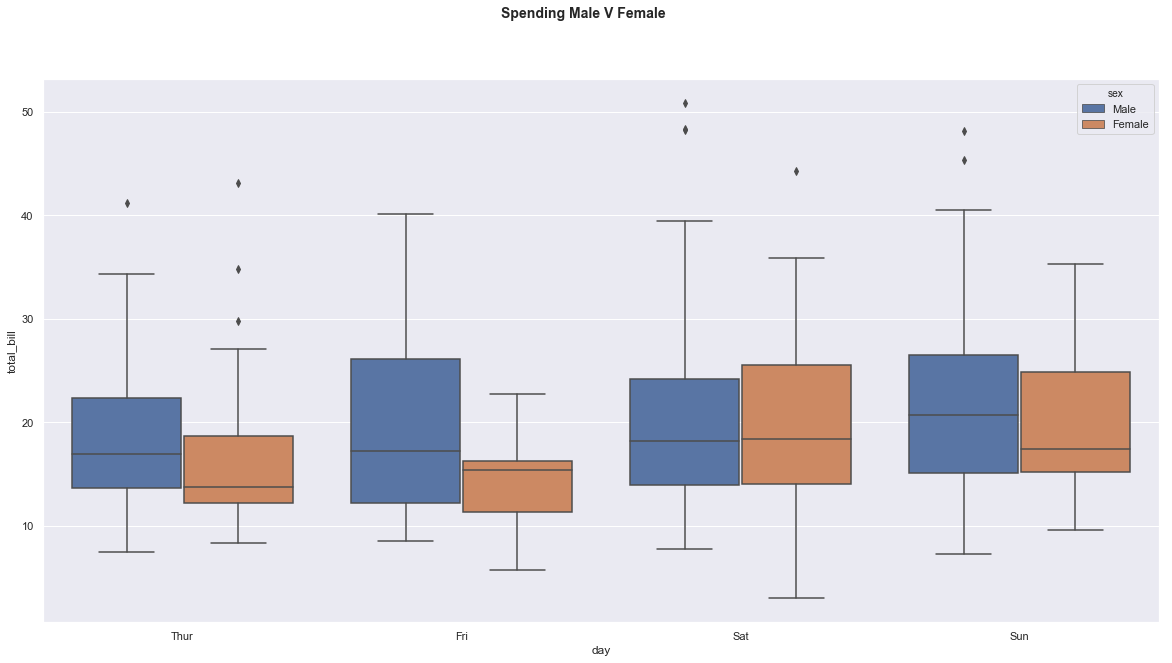

In [64]:
# Who spends more money on what days 
sns.set(rc={'figure.figsize':(20,10)})
suptitle('Spending Male V Female', fontsize=14, fontweight='bold')
sns.boxplot(x="day",y="total_bill",hue = "sex",data = tips)

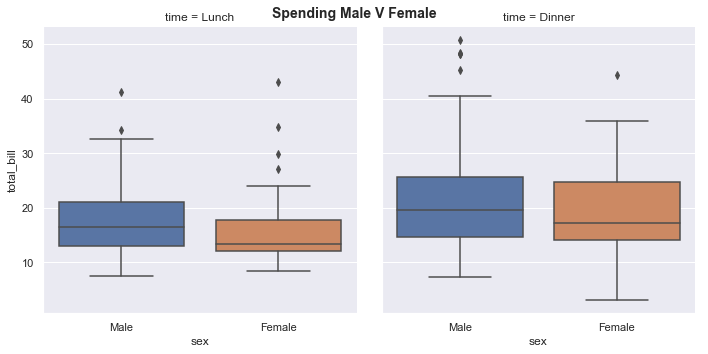

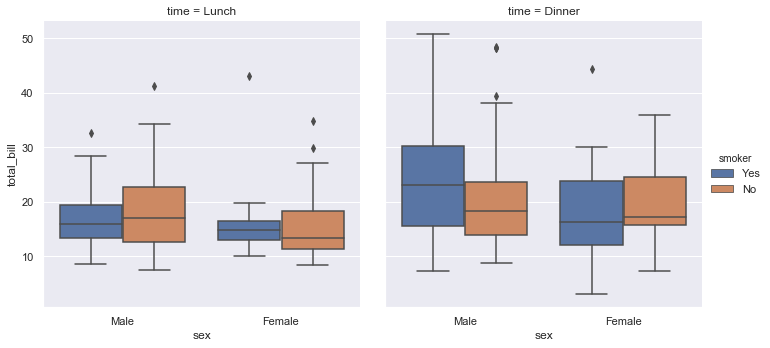

In [115]:
# Continue from the boxplot above and see Dinner V Lunch

# View based on sex
sns.catplot(x="sex", y="total_bill",col="time",data=tips, kind="box")

# View based on sex and if smoker
suptitle('Spending Male V Female', fontsize=14, fontweight='bold')
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="box")

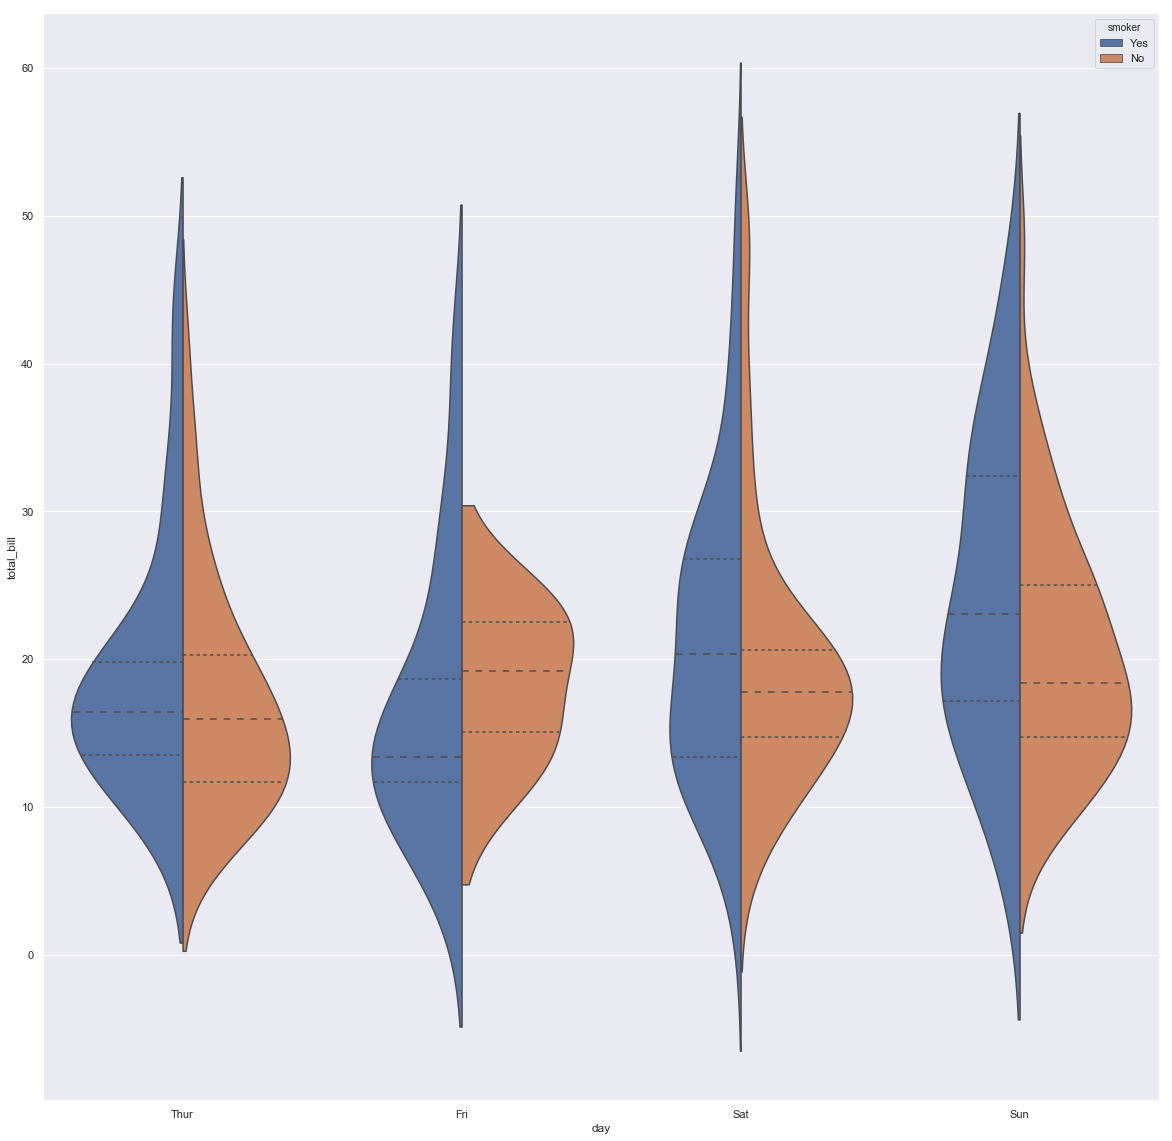

In [116]:
# Draw a nested violinplot and split the violins for easier comparison

sns.set(rc={'figure.figsize':(20,20)})
sns.violinplot(x="day", y="total_bill", hue="smoker",split=True, inner="quart",data=tips)